# Lesson 13 - Logistic Regression on MNIST Data

### The following topics are discussed in this notebook:
* Digit classification with Logistic Regression and MNIST dataset.


The MNIST dataset is a collection of 70,000 handwritten digits. Each digit is stored as a 28x28 array of integers between 1 and 255. Each array element stores the greyscale level of a pixel in a 28x28 image of the digit. 

MNIST stands for Modified National Institute of Standards and Technology. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_mldata

## Explore the Dataset

In [3]:
mnist = fetch_mldata('MNIST original')
print(type(mnist))
print(mnist)

<class 'sklearn.datasets.base.Bunch'>
{'DESCR': 'mldata.org dataset: mnist-original', 'COL_NAMES': ['label', 'data'], 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.]), 'data': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}


In [4]:
data = mnist["data"]
labels = mnist["target"]

print(type(data))
print(data.shape)

print(type(labels))
print(labels.shape)

<class 'numpy.ndarray'>
(70000, 784)
<class 'numpy.ndarray'>
(70000,)


In [8]:
np.set_printoptions(linewidth=120)
mydigit = data[36000].reshape(28,28)
print(mydigit)
np.set_printoptions(linewidth=75)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  86 131 225 225 225   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13  73 197 253 252 252 252 252   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   4  29  29 154 187 252 252 253 252 252 233 145   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  29 252 253 252 252 252 252 25

In [6]:
import matplotlib.cm as cm

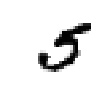

In [9]:
plt.imshow(mydigit, cmap=cm.binary)
plt.axis('off')
plt.show()

In [10]:
from scipy.misc import imresize

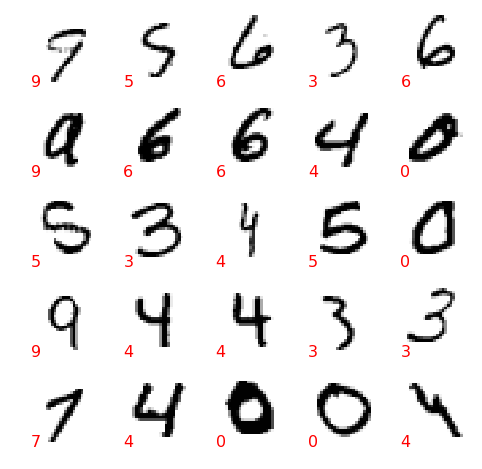

In [11]:
sel = np.random.choice(range(len(labels)), 25, replace=False)
data_sel = data[sel].reshape(25, 28,28)
labels_sel = labels[sel]

plt.close()
plt.rcParams["figure.figsize"] = [8,8]
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(data_sel[i], cmap=cm.binary)
    plt.axis('off')
    plt.text(1, 28, s = str(int(labels_sel[i])), fontsize=16, color='r')
plt.show()


## Resize Digits

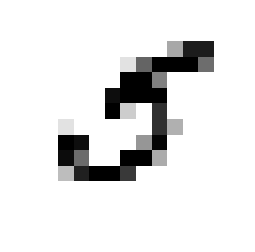

In [10]:
mydigit_small = imresize(mydigit, (14,14), interp='nearest')
plt.close()
plt.rcParams["figure.figsize"] = [4,4]
plt.imshow(mydigit_small, cmap=cm.binary)
plt.axis('off')
plt.show()

In [11]:
print(data.shape)

(70000, 784)


In [12]:
def resize_digit(row):
    temp = row.reshape(28,28)
    temp = imresize(temp, (14,14), interp='nearest')
    temp = temp.reshape(196,)
    return temp

digits_sm = np.apply_along_axis(resize_digit,axis=1,arr=data)
#digits_sm = digits_sm.reshape(70000,196)
print(digits_sm.shape)

(70000, 196)


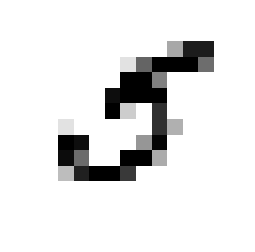

In [13]:
plt.close()
plt.rcParams["figure.figsize"] = [4,4]
plt.imshow(digits_sm[36000].reshape(14,14), cmap=cm.binary)
plt.axis('off')
plt.show()

## Apply Split Classifier

In [14]:
import MLUtilities as mlu

In [16]:
np.random.seed(1)
sel = np.random.choice(range(len(labels)), 1000, replace=False)

X_sc = digits_sm[sel].astype(int)
y_sc = np.where(labels[sel] == 8, "eight", "not eight")

sc8 = mlu.SplitClassifier(X_sc,y_sc)
sc8.summary()

+----------------------------+
|  Split Classifier Summary  |
+----------------------------+
Number of training observations: 1000
Axis/Feature split: 82
Threshold value: 71.5
Predicted class below threshold: not eight
Predicted class above threshold: eight
Training accuracy: 0.907 



## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, labels_train, labels_test = train_test_split(digits_sm, labels, test_size = 0.2, random_state=1)

y_train = np.where(labels_train == 8, 'eight', 'not eight')
y_test = np.where(labels_test == 8, 'eight', 'not eight')

print(X_train.shape)
print(X_test.shape)

(56000, 196)
(14000, 196)


In [19]:
digit_lr = LogisticRegression(C=1e90)
digit_lr.fit(X_train,y_train)

print("Training Accuracy:", digit_lr.score(X_train,y_train))
print("Testing Accuracy:", digit_lr.score(X_test,y_test))

Training Accuracy: 0.955892857143
Testing Accuracy: 0.957857142857



| Digit | Training Accuracy | Testing Accuracy |
|---|---|---|
| 0 | 0.993 | 0.991 |
| 1 | 0.992 | 0.992 |
| 2 | 0.979 | 0.979 |
| 3 | 0.974 | 0.972 |
| 4 | 0.981 | 0.981 |
| 5 | 0.971 | 0.970 |
| 6 | 0.987 | 0.987 |
| 7 | 0.984 | 0.984 |
| 8 | 0.956 | 0.958 |
| 9 | 0.962 | 0.962 |


## Analyze 8-Classifier

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_pred = digit_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[  931   412]
 [  178 12479]]


In [22]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

      eight       0.84      0.69      0.76      1343
  not eight       0.97      0.99      0.98     12657

avg / total       0.96      0.96      0.96     14000



In [25]:
wrong_pred = y_test != y_pred
X_wrong = X_test[wrong_pred,:]
labels_wrong = labels_test[wrong_pred]
y_wrong = y_test[wrong_pred]
print(y_wrong.shape)

(590,)


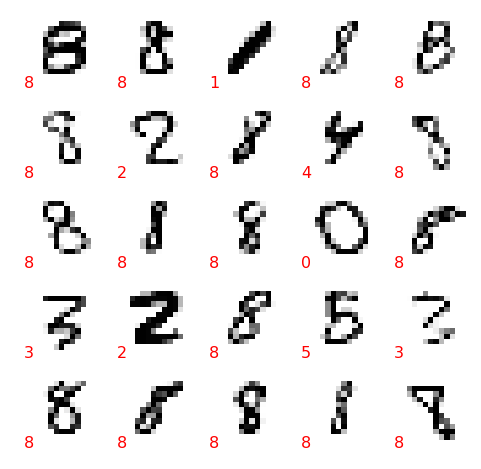

In [28]:
sel = np.random.choice(range(len(y_wrong)), 25, replace=False)
X_wrong_sel = X_wrong[sel].reshape(25, 14,14)
labels_wrong_sel = labels_wrong[sel]

plt.close()
plt.rcParams["figure.figsize"] = [8,8]
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_wrong_sel[i], cmap=cm.binary)
    plt.text(-1, 14, s = str(int(labels_wrong_sel[i])), fontsize=16, color='r')
    plt.axis('off')
plt.show()

## Multiclass Classification with Logistic Regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits_sm, labels, test_size = 0.2, random_state=1)

digit_lr = LogisticRegression()
digit_lr.fit(X_train,y_train)

print("Training Accuracy:", digit_lr.score(X_train,y_train))
print("Testing Accuracy:", digit_lr.score(X_test,y_test))

Training Accuracy: 0.910625
Testing Accuracy: 0.905785714286


In [30]:
y_pred = digit_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[1347    0    5    3    1    4   10    1   12    2]
 [   0 1587    4    5    1    8    0    2   20    2]
 [  15   13 1279   26   19    5   17   14   45    8]
 [   4    9   40 1241    6   47    8   22   39   15]
 [   2    7    8    3 1217    5   10    3    9   67]
 [  11    4    8   49   19 1030   32    3   49   24]
 [   6    9   20    1   10   19 1318    1   12    1]
 [   8   12   22    5   18    3    0 1350    6   51]
 [  11   34   21   39    5   42   15    9 1141   26]
 [  10    4    7   36   50   10    0   43    8 1171]]


In [31]:
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_mat.colums = ['0','1','2','3','4','5','6','7','8','9']
conf_mat.index = ['0','1','2','3','4','5','6','7','8','9']
conf_mat

,0,1,2,3,4,5,6,7,8,9
0,1347,0,5,3,1,4,10,1,12,2
1,0,1587,4,5,1,8,0,2,20,2
2,15,13,1279,26,19,5,17,14,45,8
3,4,9,40,1241,6,47,8,22,39,15
4,2,7,8,3,1217,5,10,3,9,67
5,11,4,8,49,19,1030,32,3,49,24
6,6,9,20,1,10,19,1318,1,12,1
7,8,12,22,5,18,3,0,1350,6,51
8,11,34,21,39,5,42,15,9,1141,26
9,10,4,7,36,50,10,0,43,8,1171


In [32]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96      1385
        1.0       0.95      0.97      0.96      1629
        2.0       0.90      0.89      0.90      1441
        3.0       0.88      0.87      0.87      1431
        4.0       0.90      0.91      0.91      1331
        5.0       0.88      0.84      0.86      1229
        6.0       0.93      0.94      0.94      1397
        7.0       0.93      0.92      0.92      1475
        8.0       0.85      0.85      0.85      1343
        9.0       0.86      0.87      0.87      1339

avg / total       0.91      0.91      0.91     14000



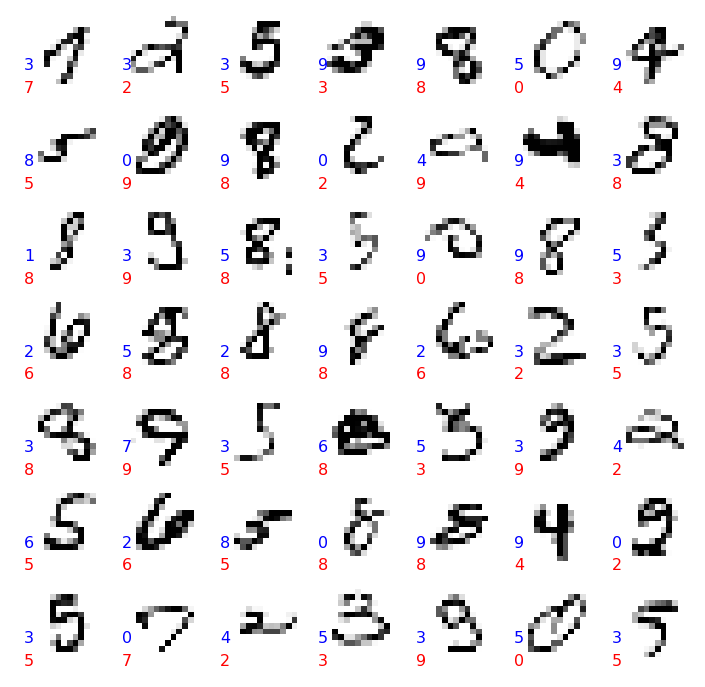

In [34]:
wrong_pred = y_test != y_pred
X_test_wrong = X_test[wrong_pred,:]
y_test_wrong = y_test[wrong_pred]
y_pred_wrong = y_pred[wrong_pred]

sel = np.random.choice(range(len(y_test_wrong)), 49, replace=False)
X_sel = X_test_wrong[sel].reshape(49, 14,14)
y_sel = y_test_wrong[sel]
y_pred_sel = y_pred_wrong[sel]

plt.close()
plt.rcParams["figure.figsize"] = [12,12]
for i in range(49):
    plt.subplot(7,7,i+1)
    plt.imshow(X_sel[i], cmap=cm.binary)
    plt.text(-1, 14, s = str(int(y_sel[i])), fontsize=16, color='r')
    plt.text(-1, 10, s = str(int(y_pred_sel[i])), fontsize=16, color='b')
    plt.axis('off')
plt.show()